In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-paper')

NaCl = [50, 100, 200, 300, 400, 500]

# BME reweighting

In [ ]:
#Plot SAXS frames

concs = [50, 100, 200, 300, 400, 500]
frames = 20001

for conc in concs:

    fig = plt.figure(figsize=(5,5))
    axes = fig.add_axes([1,1,1,1])

    directory = '../hnRNPA1_ionicstrength_2_productionrun/%smM/stage_reduced/' % str(conc)
    for i in range(frames):
        q, Iexp, dIexp, Ifit = np.genfromtxt(directory + 'Free_AA_frame%schain_0.fit' % str(i), usecols=(0,1,2,3), skip_header=6, unpack=True)
        plt.plot(q, Ifit, color='black', alpha=0.5)
    plt.plot(q,Iexp,label='Exp', color='red')
    plt.title(str(conc)+'mM', fontsize=15)
    
    fig.savefig("../figures/SAXS_frames_and_exp_%smM.pdf" % conc, bbox_inches='tight', pad_inches=1)


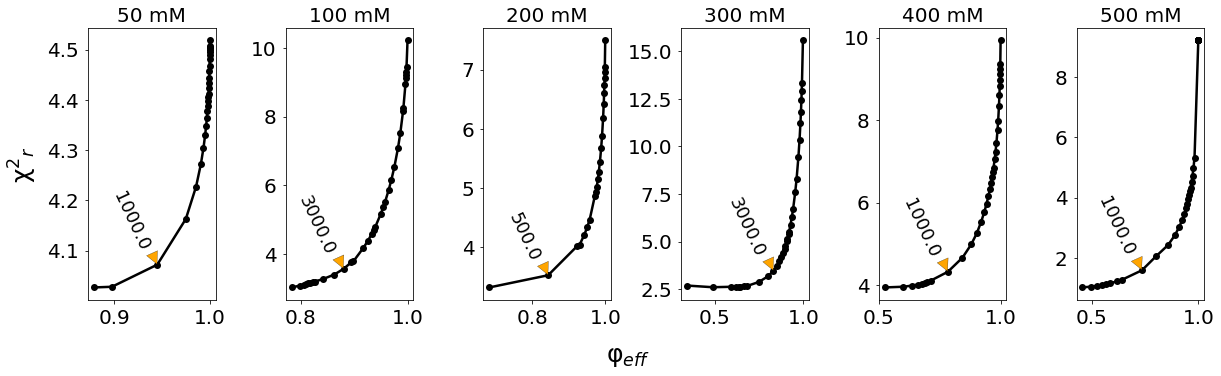

In [3]:
#Plot phi_eff vs chi2

theta = []
Neff = []
Chi2r = []
conclist = [50,100,200,300,400,500]
thetalist = [1000,3000,500,3000,1000,1000]

for conc in conclist:
    directory = '../hnRNPA1_ionicstrength_2_productionrun/%smM/stage_reduced/' % str(conc)
    theta.append(np.genfromtxt(directory + 'BME_0.dat', skip_header=1, usecols=(0), unpack=True))
    Neff.append(np.genfromtxt(directory + 'BME_0.dat', skip_header=1, usecols=(1), unpack=True))  
    Chi2r.append(np.genfromtxt(directory + 'BME_0.dat', skip_header=1, usecols=(3), unpack=True))

fig, ax = plt.subplots(figsize=(20,5), ncols=6, sharex='col')

for i in range(len(conclist)):
    ax[i].plot(Neff[i], Chi2r[i], 'o-', color='black', linewidth=2.5, markersize=7)
    #ax[i].set_xticks(np.arange(0, 1.1, step=0.5))
    #ax[i].set_yticks(np.arange(0, 10.1, step=2))
    #ax[i].set_xlim(left=0.95, right=1)
    #ax[i].set_ylim(top=12, bottom=0)
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].set_title(str(conclist[i]) + ' mM', fontsize=20)
    for x, y, z in zip(Neff[i], Chi2r[i], theta[i]):
        if z == thetalist[i]:
            ax[i].annotate('{}'.format(z), xy=(x,y), xytext=(-5, 15), ha='right', textcoords='offset points', fontsize=18, rotation=-65, arrowprops=dict(facecolor='orange', shrink=0.05),)

plt.subplots_adjust(wspace = 0.55)
    
fig.text(0.5, 0, 'φ$_{eff}$', ha='center', va='top', fontsize=25)
fig.text(0.08, 0.5, 'χ$^{2}$$_{r}$', ha='center', va='center', fontsize=25, rotation=90)

fig.savefig("../figures/phieff_Chi2r_theta.pdf", bbox_inches='tight', pad_inches=1)

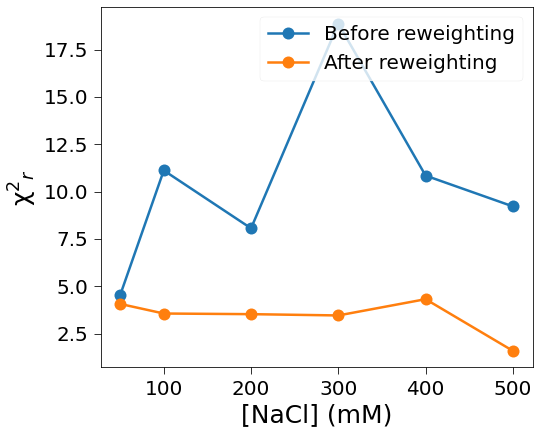

In [4]:
Chi2r_beforerew = []

chi2_before = []
chi2_after = []
for i in range(len(conclist)):
    directory = '../hnRNPA1_ionicstrength_2_productionrun/%smM/stage_reduced/' % str(conclist[i])
    Chi2r_beforerew.append(np.genfromtxt(directory + 'BME_0.dat', skip_header=1, usecols=(2), unpack=True))
    for x, y, z in zip(Chi2r_beforerew[i], Chi2r[i], theta[i]):
        if z == thetalist[i]:
            chi2_before.append(x)
            chi2_after.append(y)

fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(conclist, chi2_before, 'o-', linewidth=2.5, markersize=12, label='Before reweighting')
plt.plot(conclist, chi2_after, 'o-', linewidth=2.5, markersize=12, label='After reweighting')

plt.legend(fontsize=20)

#plt.ylim(2.8, 3.3)
#plt.xlim(40, 510)

plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('χ$^{2}$$_{r}$', fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig("../figures/chi2_vs_NaCl_beforeafterrew.pdf", bbox_inches='tight', pad_inches=1)

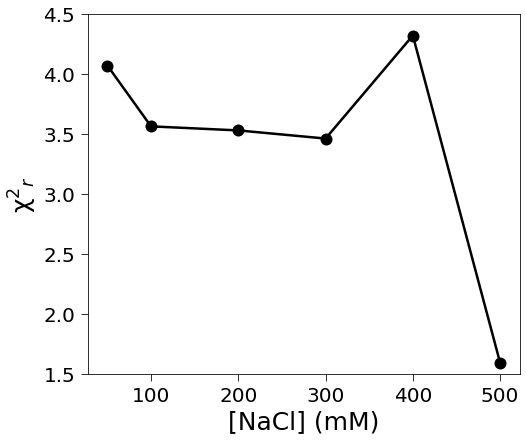

In [6]:
fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(conclist, chi2_after, 'o-', linewidth=2.5, markersize=12, color='black')

#plt.ylim(2.8, 3.3)
#plt.xlim(40, 510)

plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('χ$^{2}$$_{r}$', fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.ylim(1.5, 4.5)

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig("../figures/chi2_vs_NaCl.pdf", bbox_inches='tight', pad_inches=1)

# Average SAXS profile

In [ ]:
#Get SAXS data and calculate average SAXS
conclist = [50,100,200,300,400,500]

first_frame = 1000
last_frame = 20000
#theta = 100

for j in range(len(conclist)):
    output = "Ifit_average_%imM.dat" % conclist[j]
    experimentalfile = "../hnRNPA1_ionicstrength_2_productionrun/%smM/stage_reduced/" % conclist[j]

    nr_of_frames = last_frame-first_frame+1


    #Make arrays of I with 0 for every q, to add to later
    Ifit_sum = []
    Ifit_weighted_avg = []
    q =  np.genfromtxt('../hnRNPA1_ionicstrength_2_productionrun/%smM/stage_reduced/w_AA_frame%ichain_0.fit' % (conclist[j], first_frame),skip_header=6,skip_footer=0,usecols=[0],unpack=True)
    Ifit_sum = [0]*len(q)
    Ifit_weightedavg = [0]*len(q)

    #load weights
    weights = np.genfromtxt('weights_%imM.dat' % conclist[j],skip_header=0,skip_footer=0,usecols=[1],unpack=True)
    #uniformly average I over all files and weighted average I over all files
    for i in range(first_frame,last_frame+1):
        q,Iexp,dI,Ifit =  np.genfromtxt('../hnRNPA1_ionicstrength_2_productionrun/%smM/stage_reduced/w_AA_frame%ichain_0.fit' % (conclist[j],i),skip_header=6,skip_footer=0,usecols=[0,1,2,3],unpack=True)
        Ifit_sum += Ifit
        Ifit_weightedavg += Ifit*weights[i-first_frame]
    Ifit_avg = Ifit_sum/nr_of_frames

    err = np.genfromtxt(experimentalfile,skip_header=1,skip_footer=0,usecols=[2],unpack=True)
    
    #Calculate residuals
    residuals_avg = (Iexp-Ifit_avg)/err
    residuals_weightedavg = (Iexp-Ifit_weightedavg)/err

    #Write file with average SAXS and residuals
    with open(output, 'w') as f:
        f.write('#q \t Iexp \t Ifit_avg \t Residuals_avg \t Ifit_weightedavg \t Residuals_weightedavg \n')
        for i in range(len(q)):
            f.write("%e \t%e \t%e \t%e \t%e \t%e \n" % (q[i], Iexp[i], Ifit_avg[i], residuals_avg[i], Ifit_weightedavg[i], residuals_weightedavg[i]))


In [ ]:
#Plot
DC = plt.rcParams['axes.prop_cycle'].by_key()['color']

conclist = [50,100,200,300,400,500]

for i in range(len(conclist)):

    q, Iexp, Ifit_avg, Residuals_avg, Ifit_weightedavg, Residuals_weightedavg = np.genfromtxt('Ifit_average_' + str(conclist[i]) + 'mM.dat', skip_header=1, usecols=(0,1,2,3,4,5), unpack=True)

    fig, ax = plt.subplots(figsize = (7,7), nrows=3, sharex='col', sharey='row', gridspec_kw={'height_ratios': [4, 1, 1]})

    ax[0].plot(q, Iexp, color='black', linewidth=0.5)
    ax[0].plot(q, Ifit_avg, linewidth=2, label="Before reweighting", alpha=0.75)
    ax[0].plot(q, Ifit_weightedavg, linewidth=2, label="After reweighting", alpha=0.75)
    ax[0].semilogy()
    ax[0].set_ylabel('I(q)/I$_{0}$', fontsize=20)
    #ax[0].set_xlim(left=0, right=0.3)
    ax[0].legend(fontsize=12, loc='lower left')
    ax[0].set_title(str(conclist[i]) + 'mM NaCl', fontsize=20)

    for j in range(len(ax)):
        ax[j].tick_params(axis='both', which='major', labelsize=20)

    ax[1].plot(q, Residuals_avg, color= DC[0], alpha=0.75)
    ax[1].set_title('Before reweighting', fontsize=15)
    ax[1].set_ylabel('ΔI/σ', fontsize=20)
    ax[1].set_ylim(bottom=-10, top=10)

    ax[2].plot(q, Residuals_weightedavg, color= DC[1], alpha=0.75)
    ax[2].set_title('After reweighting', fontsize=15)
    ax[2].set_ylabel('ΔI/σ', fontsize=20)
    ax[2].set_ylim(bottom=-10, top=10)

    fig.text(0.5, 0.055, 'q (Å$^{-1}$)', ha='center', va='top', fontsize=20)

    plt.subplots_adjust(hspace = 0.35)
    
    fig.savefig("../figures/Ifit_beforeafter_rew_%imM.pdf" % conclist[i], bbox_inches='tight', pad_inches=1)
    

# LCD-SUMO and LCD-RRM contacts per resi

## LCD-SUMO contacts per resi (SUMO)

In [3]:
resi = range(1,118)

directory = '/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

In [4]:
#Load contacts from .xvg files
avg_contacts_per_resi_NaCl = []
avg_contacts_per_resi_rew_NaCl = []

for conc in NaCl:
    
    avg_contacts_per_resi = []
    avg_contacts_per_resi_rew = []
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_SUMO/' + str(conc) + 'mM/LCD_HisSUMO_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)
        
        avg_contacts_per_resi.append(np.average(contacts))
        avg_contacts_per_resi_rew.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl.append(avg_contacts_per_resi)
    avg_contacts_per_resi_rew_NaCl.append(avg_contacts_per_resi_rew)

In [5]:
#Write to files
for i in range(len(NaCl)):
    with open(directory + 'LCD_resicontacts_SUMO_' + str(NaCl[i]) + 'mM_group.dat', 'w') as output:
        output.write('#Resi \t LCD_contacts \t LCD_contacts_rew \n')
        for j in range(len(resi)):
            output.write('%i \t %f \t %f \n' % (resi[j], avg_contacts_per_resi_NaCl[i][j], avg_contacts_per_resi_rew_NaCl[i][j]))
            

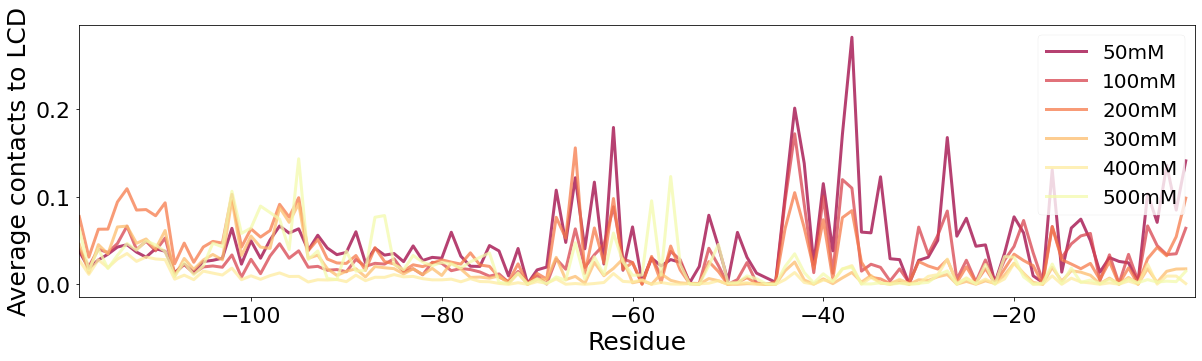

In [6]:
#Plot
fig, ax = plt.subplots(figsize=(20,5))

ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,0.55,6)))

Resinums = range(-118,-1)

for i in range(len(NaCl)):
    ax.plot(Resinums, avg_contacts_per_resi_rew_NaCl[i], alpha=0.75, label=str(NaCl[i]) + 'mM', linewidth=3)

plt.legend(fontsize=20, loc='upper right')
#plt.xticks(np.arange(-100, 301, step=50))
#plt.yticks(np.arange(0, 1.1, step=0.5))
plt.xlim(-118, -1)
#plt.ylim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Residue', fontsize=25)
plt.ylabel('Average contacts to LCD', fontsize=25)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/LCD_SUMO_contactsperresi_group.pdf', bbox_inches='tight', pad_inches=1)


## LCD-SUMO contacts per resi (LCD)

In [7]:
resi = range(314,434)

directory = '/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

In [8]:
#Load contacts from .xvg files
avg_contacts_per_resi_NaCl = []
avg_contacts_per_resi_rew_NaCl = []

for conc in NaCl:
    avg_contacts_per_resi = []
    avg_contacts_per_resi_rew = []
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_SUMO_LCDres/' + str(conc) + 'mM/LCD_SUMO_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)
                
        avg_contacts_per_resi.append(np.average(contacts))
        avg_contacts_per_resi_rew.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl.append(avg_contacts_per_resi)
    avg_contacts_per_resi_rew_NaCl.append(avg_contacts_per_resi_rew)

In [9]:
#Write to files
for i in range(len(NaCl)):
    with open(directory + 'SUMO_resicontacts_LCD_' + str(NaCl[i]) + 'mM_group.dat', 'w') as output:
        output.write('#Resi \t SUMO_contacts \t SUMO_contacts_rew \n')
        for j in range(len(resi)):
            output.write('%i \t %f \t %f \n' % (resi[j], avg_contacts_per_resi_NaCl[i][j], avg_contacts_per_resi_rew_NaCl[i][j]))
            

[195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320]


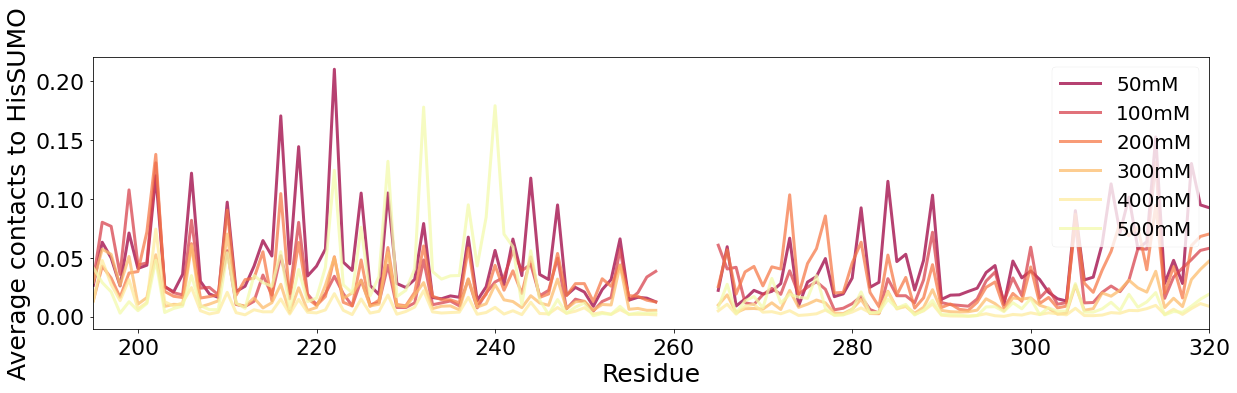

In [10]:
#Plot
fig, ax = plt.subplots(figsize=(20,5))

ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,0.55,6)))

Resinums = []
for i in range(314-119, 259):
    Resinums.append(i)
for i in range(265,434-119+6):
    Resinums.append(i)
print(Resinums)

for i in range(len(NaCl)):
    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(Resinums[:Resinums.index(258)+1], avg_contacts_per_resi_rew_NaCl[i][:Resinums.index(258)+1], color=color, alpha=0.75, label=str(NaCl[i]) + 'mM', linewidth=3)
    ax.plot(Resinums[Resinums.index(265):], avg_contacts_per_resi_rew_NaCl[i][Resinums.index(265):], color=color, alpha=0.75, linewidth=3)
    
plt.legend(fontsize=20, loc='upper right')
#plt.xticks(np.arange(-100, 301, step=50))
#plt.yticks(np.arange(0, 1.1, step=0.5))
plt.xlim(195, 320)
#plt.ylim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Residue', fontsize=25)
plt.ylabel('Average contacts to HisSUMO', fontsize=25)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/LCD_SUMO_contactsperresiLCD_group.pdf', bbox_inches='tight', pad_inches=1)


## LCD-RRM contacts per resi (LCD)

In [11]:
resi = range(314,434)

directory = '/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

In [12]:
#Load contacts from .xvg files
avg_contacts_per_resi_NaCl = []
avg_contacts_per_resi_rew_NaCl = []

for conc in NaCl:
    
    avg_contacts_per_resi = []
    avg_contacts_per_resi_rew = []
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_LCDres/' + str(conc) + 'mM/LCD_RRM_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)
                
        avg_contacts_per_resi.append(np.average(contacts))
        avg_contacts_per_resi_rew.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl.append(avg_contacts_per_resi)
    avg_contacts_per_resi_rew_NaCl.append(avg_contacts_per_resi_rew)

In [13]:
#Write to files
for i in range(len(NaCl)):
    with open(directory + 'RRMs_resicontacts_LCD_' + str(NaCl[i]) + 'mM_group.dat', 'w') as output:
        output.write('#Resi \t RRMs_contacts \t RRMs_contacts_rew \n')
        for j in range(len(resi)):
            output.write('%i \t %f \t %f \n' % (resi[j], avg_contacts_per_resi_NaCl[i][j], avg_contacts_per_resi_rew_NaCl[i][j]))
            

[195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320]


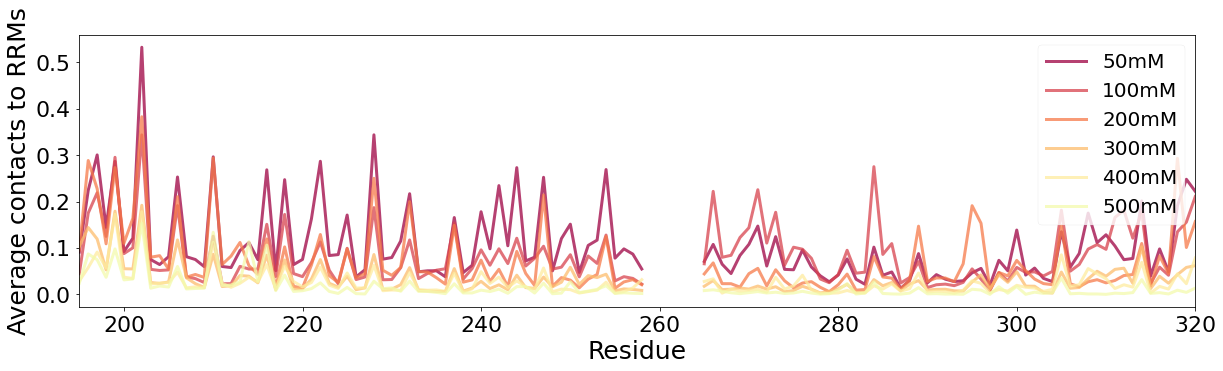

In [14]:
#Plot
fig, ax = plt.subplots(figsize=(20,5))

ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,0.55,6)))

Resinums = []
for i in range(314-119, 259):
    Resinums.append(i)
for i in range(265,434-119+6):
    Resinums.append(i)
print(Resinums)

for i in range(len(NaCl)):
    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(Resinums[:Resinums.index(258)+1], avg_contacts_per_resi_rew_NaCl[i][:Resinums.index(258)+1], color=color, alpha=0.75, label=str(NaCl[i]) + 'mM', linewidth=3)
    ax.plot(Resinums[Resinums.index(265):], avg_contacts_per_resi_rew_NaCl[i][Resinums.index(265):], color=color, alpha=0.75, linewidth=3)
    
plt.legend(fontsize=20, loc='upper right')
#plt.xticks(np.arange(-100, 301, step=50))
#plt.yticks(np.arange(0, 1.1, step=0.5))
plt.xlim(195, 320)
#plt.ylim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Residue', fontsize=25)
plt.ylabel('Average contacts to RRMs', fontsize=25)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/LCD_RRMs_contactsperresiLCD_group.pdf', bbox_inches='tight', pad_inches=1)


## LCD-RRM contacts per resi (RRMs)

In [15]:
#Load contacts from .xvg files

directory='/storage1/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

resi = range(133,304)
NaCl = [50, 100, 200, 300, 400, 500]

avg_contacts_per_resi_NaCl = []
avg_contacts_per_resi_rew_NaCl = []

for conc in NaCl: 
    avg_contacts_per_resi = []
    avg_contacts_per_resi_rew = []
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_LCD_RRMsres/' + str(conc) + 'mM/LCD_RRMs_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)    
        
        avg_contacts_per_resi.append(np.average(contacts))
        avg_contacts_per_resi_rew.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl.append(avg_contacts_per_resi)
    avg_contacts_per_resi_rew_NaCl.append(avg_contacts_per_resi_rew)

In [16]:
#Write to files
for i in range(len(NaCl)):
    with open(directory + 'LCD_resicontacts_RRMs_' + str(NaCl[i]) + 'mM_group.dat', 'w') as output:
        output.write('#Resi \t LCD_contacts \t LCD_contacts_rew \n')
        for j in range(len(resi)):
            output.write('%i \t %f \t %f \n' % (resi[j], avg_contacts_per_resi_NaCl[i][j], avg_contacts_per_resi_rew_NaCl[i][j]))


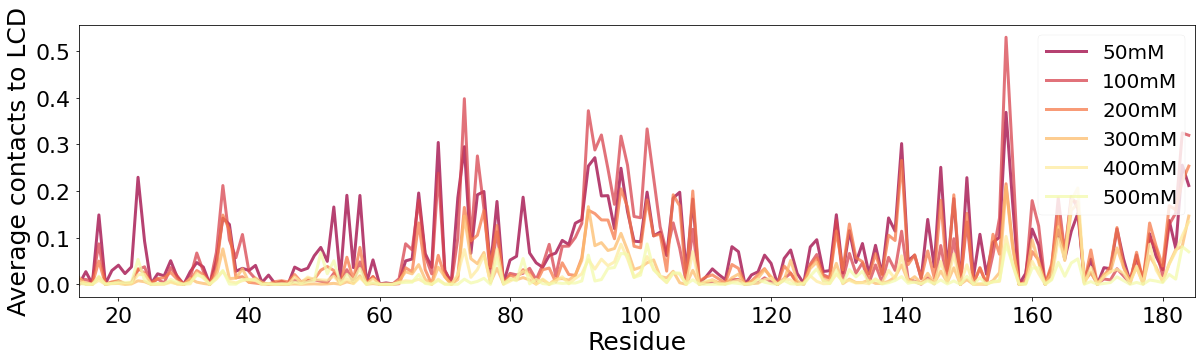

In [17]:
#Plot
fig, ax = plt.subplots(figsize=(20,5))

ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,0.55,6)))

Resinums = range(133-119, 304-119)     

for i in range(len(NaCl)):
    ax.plot(Resinums, avg_contacts_per_resi_rew_NaCl[i], alpha=0.75, label=str(NaCl[i]) + 'mM', linewidth=3)
    
plt.legend(fontsize=20, loc='upper right')
#plt.xticks(np.arange(-100, 301, step=50))
#plt.yticks(np.arange(0, 1.1, step=0.5))
plt.xlim(133-119, 304-119)
#plt.ylim(0, 1)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Residue', fontsize=25)
plt.ylabel('Average contacts to LCD', fontsize=25)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/LCD_RRMs_contactsperresiRRMs_group.pdf', bbox_inches='tight', pad_inches=1)


## LCD-RRM contacts per resi (LCD) and LCD-SUMO contacs per resi (LCD)

In [52]:
#Get contacts for RRMs contacts

directory='/storage1/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

resi = range(314,434)
NaCl = [50, 100, 200, 300, 400, 500]

avg_contacts_per_resi_NaCl_RRMs = []
avg_contacts_per_resi_rew_NaCl_RRMs = []

for conc in NaCl: 
    avg_contacts_per_resi_RRMs = []
    avg_contacts_per_resi_rew_RRMs = []
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_LCDres/' + str(conc) + 'mM/LCD_RRM_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)    
        
        avg_contacts_per_resi_RRMs.append(np.average(contacts))
        avg_contacts_per_resi_rew_RRMs.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl_RRMs.append(avg_contacts_per_resi_RRMs)
    avg_contacts_per_resi_rew_NaCl_RRMs.append(avg_contacts_per_resi_rew_RRMs)

In [53]:
#Load contacts for HisSUMO contacts
avg_contacts_per_resi_NaCl_HisSUMO = []
avg_contacts_per_resi_rew_NaCl_HisSUMO = []

for conc in NaCl:
    avg_contacts_per_resi_HisSUMO = []
    avg_contacts_per_resi_rew_HisSUMO = []
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_SUMO_LCDres/' + str(conc) + 'mM/LCD_SUMO_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)
                
        avg_contacts_per_resi_HisSUMO.append(np.average(contacts))
        avg_contacts_per_resi_rew_HisSUMO.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl_HisSUMO.append(avg_contacts_per_resi_HisSUMO)
    avg_contacts_per_resi_rew_NaCl_HisSUMO.append(avg_contacts_per_resi_rew_HisSUMO)

[195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320]


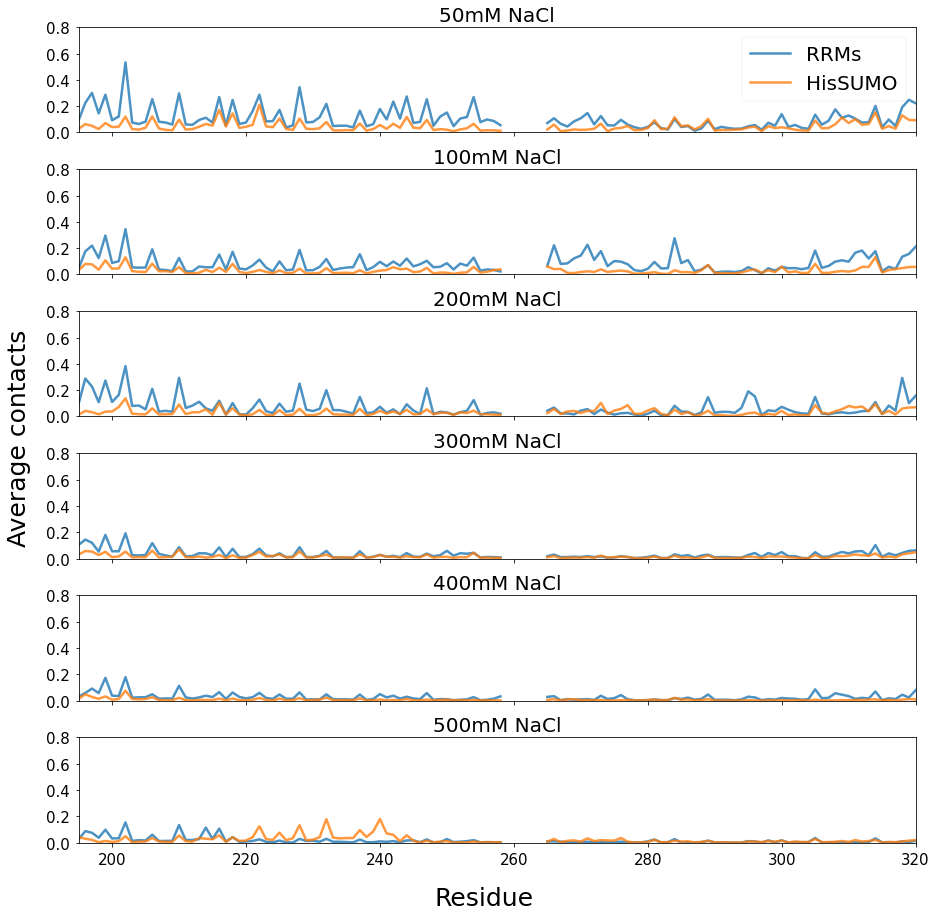

In [54]:
#Plot

fig, ax = plt.subplots(figsize = (15,15), nrows=6, sharex='col', sharey='row')

Resinums = []
for i in range(314-119, 259):
    Resinums.append(i)
for i in range(265,434-119+6):
    Resinums.append(i)
print(Resinums)

for i in range(len(NaCl)):
    ax[i].plot(Resinums[:Resinums.index(258)+1], avg_contacts_per_resi_rew_NaCl_RRMs[i][:Resinums.index(258)+1], color='C0', label='RRMs', linewidth=2.5, alpha=0.8)
    ax[i].plot(Resinums[Resinums.index(265):], avg_contacts_per_resi_rew_NaCl_RRMs[i][Resinums.index(265):], color='C0', linewidth=2.5, alpha=0.8)

    ax[i].plot(Resinums[:Resinums.index(258)+1], avg_contacts_per_resi_rew_NaCl_HisSUMO[i][:Resinums.index(258)+1], color='C1', label='HisSUMO', linewidth=2.5, alpha=0.8)
    ax[i].plot(Resinums[Resinums.index(265):], avg_contacts_per_resi_rew_NaCl_HisSUMO[i][Resinums.index(265):], color='C1', linewidth=2.5, alpha=0.8)

    
    #ax[i].set_xticks(np.arange(20, 181, step=20))
    ax[i].set_yticks(np.arange(0, 0.9, step=0.2))
    ax[i].set_xlim(195, 320)
    ax[i].set_ylim(bottom=0, top=0.8)
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].set_title('%imM NaCl' % NaCl[i], fontsize=20)

ax[0].legend(fontsize=20, loc="upper right")
plt.subplots_adjust(hspace = 0.35)           
             
fig.text(0.5, 0.085, 'Residue', ha='center', va='top', fontsize=25)
fig.text(0.07, 0.5, 'Average contacts', rotation=90, ha='center', va='center', fontsize=25)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/RRMsLCD_HisSUMOLCD_contacts_per_resiLCD_NaClsep_group.pdf', bbox_inches='tight', pad_inches=1)

## LCD-RRM contacts per resi (RRM) with and without His-SUMO tag

In [55]:
#Get contacts for no His-SUMO construct

directory='/storage1/thomasen/hnRNPA1/ionicstrength_notag_productionrun/data/'

resi = range(133,304)
NaCl = [50, 150, 250, 250, 400, 1000]

avg_contacts_per_resi_NaCl = []
avg_contacts_per_resi_rew_NaCl = []

for conc in NaCl: 
    avg_contacts_per_resi = []
    avg_contacts_per_resi_rew = []
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_LCDRRM/' + str(conc) + 'mM/LCD_RRM_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)    
        
        avg_contacts_per_resi.append(np.average(contacts))
        avg_contacts_per_resi_rew.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl.append(avg_contacts_per_resi)
    avg_contacts_per_resi_rew_NaCl.append(avg_contacts_per_resi_rew)

In [56]:
#Get contacts for His-SUMO construct

directory='/storage1/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

resi = range(133,304)
NaCl_HisSUMO = [50, 100, 200, 300, 400, 500]

avg_contacts_per_resi_NaCl_HisSUMO = []
avg_contacts_per_resi_rew_NaCl_HisSUMO = []

for conc in NaCl_HisSUMO: 
    avg_contacts_per_resi_HisSUMO = []
    avg_contacts_per_resi_rew_HisSUMO = []
    
    weights_HisSUMO = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_LCD_RRMsres/' + str(conc) + 'mM/LCD_RRMs_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)    
        
        avg_contacts_per_resi_HisSUMO.append(np.average(contacts))
        avg_contacts_per_resi_rew_HisSUMO.append(np.average(contacts, weights=weights_HisSUMO))
        
    avg_contacts_per_resi_NaCl_HisSUMO.append(avg_contacts_per_resi_HisSUMO)
    avg_contacts_per_resi_rew_NaCl_HisSUMO.append(avg_contacts_per_resi_rew_HisSUMO)

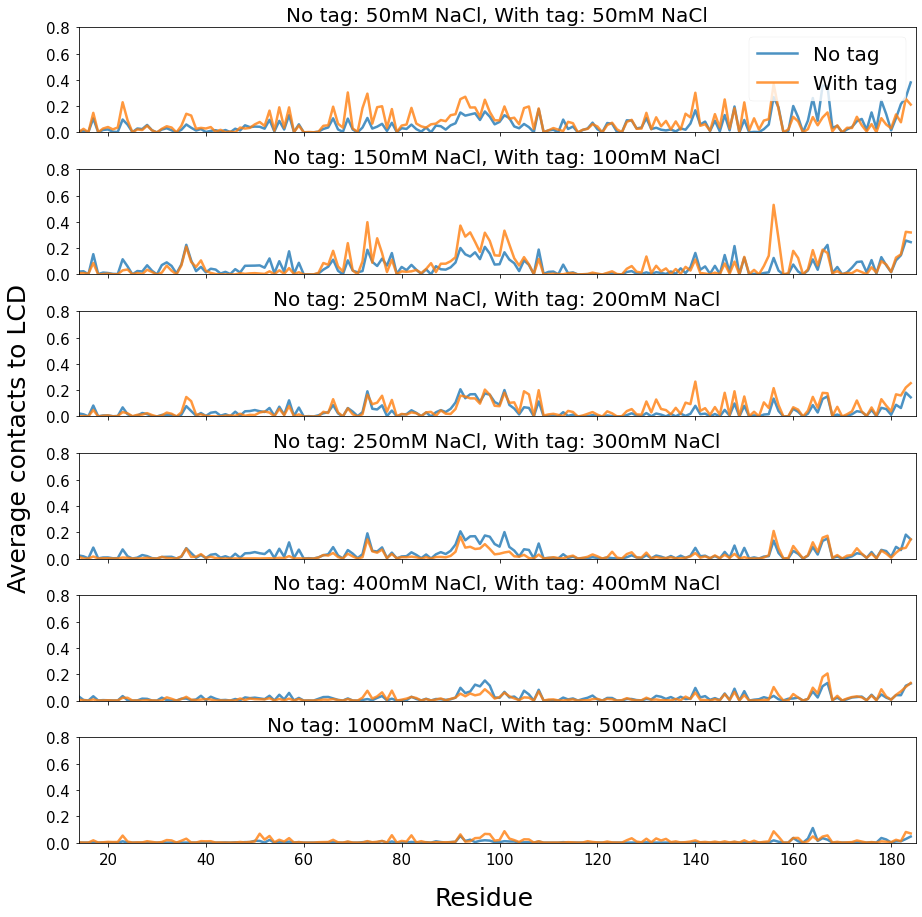

In [57]:
#Plot

resnum = range(133-119, 304-119)

fig, ax = plt.subplots(figsize = (15,15), nrows=6, sharex='col', sharey='row')


for i in range(len(NaCl)):
    ax[i].plot(resnum, avg_contacts_per_resi_rew_NaCl[i], label='No tag', linewidth=2.5, alpha=0.8)
    ax[i].plot(resnum, avg_contacts_per_resi_rew_NaCl_HisSUMO[i], label='With tag', linewidth=2.5, alpha=0.8)
    
    
    ax[i].set_xticks(np.arange(20, 181, step=20))
    ax[i].set_yticks(np.arange(0, 0.9, step=0.2))
    ax[i].set_xlim(133-119, 304-119)
    ax[i].set_ylim(bottom=0, top=0.8)
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].set_title('No tag: %imM NaCl, With tag: %imM NaCl' % (NaCl[i], NaCl_HisSUMO[i]), fontsize=20)

ax[0].legend(fontsize=20, loc="upper right")
plt.subplots_adjust(hspace = 0.35)           
             
fig.text(0.5, 0.085, 'Residue', ha='center', va='top', fontsize=25)
fig.text(0.07, 0.5, 'Average contacts to LCD', rotation=90, ha='center', va='center', fontsize=25)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/RRMsLCD_contacts_per_resi_with_without_tag_NaClsep_group.pdf', bbox_inches='tight', pad_inches=1)

## LCD-RRM contacts per resi (LCD) with and without His-SUMO tag

In [58]:
#Get contacts for no His-SUMO construct

directory='/storage1/thomasen/hnRNPA1/ionicstrength_notag_productionrun/data/'

resi = range(314,434)
NaCl = [50, 150, 250, 250, 400, 1000]

avg_contacts_per_resi_NaCl = []
avg_contacts_per_resi_rew_NaCl = []

for conc in NaCl: 
    avg_contacts_per_resi = []
    avg_contacts_per_resi_rew = []
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_LCDres/' + str(conc) + 'mM/LCD_RRM_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)    
        
        avg_contacts_per_resi.append(np.average(contacts))
        avg_contacts_per_resi_rew.append(np.average(contacts, weights=weights))
        
    avg_contacts_per_resi_NaCl.append(avg_contacts_per_resi)
    avg_contacts_per_resi_rew_NaCl.append(avg_contacts_per_resi_rew)

In [59]:
#Get contacts for His-SUMO construct

directory='/storage1/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

resi = range(314,434)
NaCl_HisSUMO = [50, 100, 200, 300, 400, 500]

avg_contacts_per_resi_NaCl_HisSUMO = []
avg_contacts_per_resi_rew_NaCl_HisSUMO = []

for conc in NaCl_HisSUMO: 
    avg_contacts_per_resi_HisSUMO = []
    avg_contacts_per_resi_rew_HisSUMO = []
    
    weights_HisSUMO = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))
    
    for i in resi:
        contacts = np.genfromtxt(directory + 'resicontacts_LCDres/' + str(conc) + 'mM/LCD_RRM_' + str(conc) + 'mM_resi' + str(i) + '.xvg', usecols=(1), skip_header=24)    
        
        avg_contacts_per_resi_HisSUMO.append(np.average(contacts))
        avg_contacts_per_resi_rew_HisSUMO.append(np.average(contacts, weights=weights_HisSUMO))
        
    avg_contacts_per_resi_NaCl_HisSUMO.append(avg_contacts_per_resi_HisSUMO)
    avg_contacts_per_resi_rew_NaCl_HisSUMO.append(avg_contacts_per_resi_rew_HisSUMO)

[195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320]


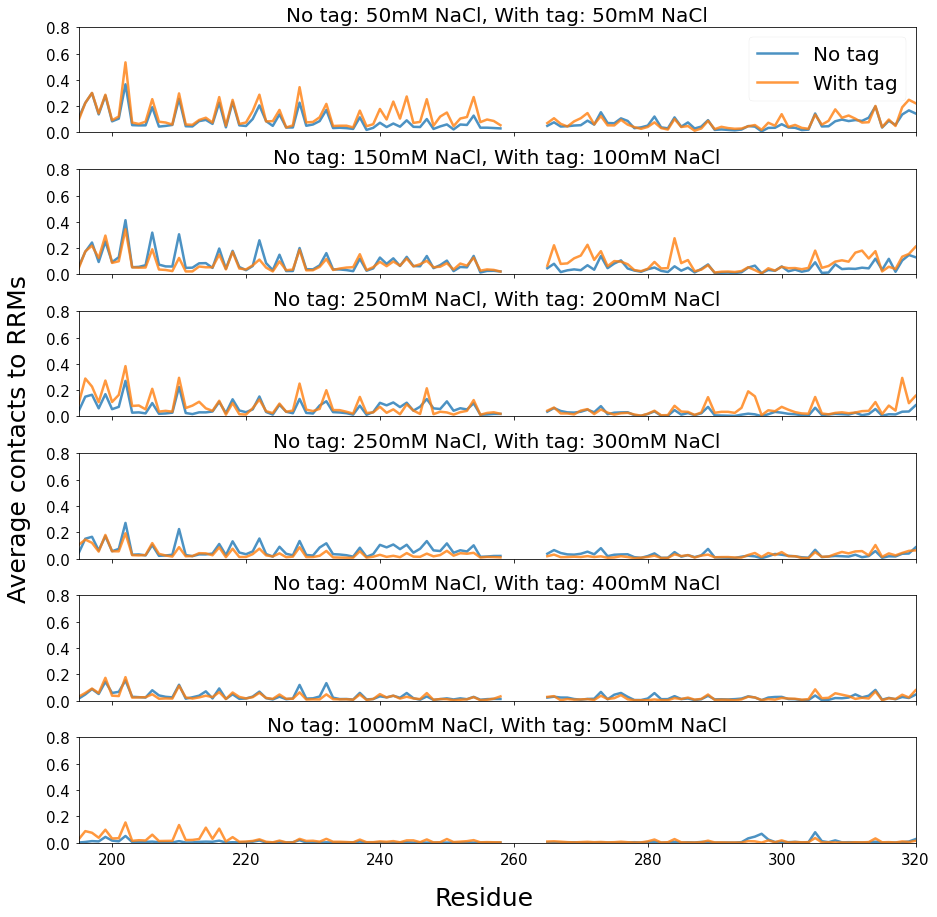

In [60]:
#Plot

fig, ax = plt.subplots(figsize = (15,15), nrows=6, sharex='col', sharey='row')

Resinums = []
for i in range(314-119, 259):
    Resinums.append(i)
for i in range(265,434-119+6):
    Resinums.append(i)
print(Resinums)

for i in range(len(NaCl)):
    ax[i].plot(Resinums[:Resinums.index(258)+1], avg_contacts_per_resi_rew_NaCl[i][:Resinums.index(258)+1], color='C0', label='No tag', linewidth=2.5, alpha=0.8)
    ax[i].plot(Resinums[Resinums.index(265):], avg_contacts_per_resi_rew_NaCl[i][Resinums.index(265):], color='C0', linewidth=2.5, alpha=0.8)

    ax[i].plot(Resinums[:Resinums.index(258)+1], avg_contacts_per_resi_rew_NaCl_HisSUMO[i][:Resinums.index(258)+1], color='C1', label='With tag', linewidth=2.5, alpha=0.8)
    ax[i].plot(Resinums[Resinums.index(265):], avg_contacts_per_resi_rew_NaCl_HisSUMO[i][Resinums.index(265):], color='C1', linewidth=2.5, alpha=0.8)

    
    #ax[i].set_xticks(np.arange(20, 181, step=20))
    ax[i].set_yticks(np.arange(0, 0.9, step=0.2))
    ax[i].set_xlim(195, 320)
    ax[i].set_ylim(bottom=0, top=0.8)
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].set_title('No tag: %imM NaCl, With tag: %imM NaCl' % (NaCl[i], NaCl_HisSUMO[i]), fontsize=20)

ax[0].legend(fontsize=20, loc="upper right")
plt.subplots_adjust(hspace = 0.35)           
             
fig.text(0.5, 0.085, 'Residue', ha='center', va='top', fontsize=25)
fig.text(0.07, 0.5, 'Average contacts to RRMs', rotation=90, ha='center', va='center', fontsize=25)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/RRMsLCD_contacts_per_resiLCD_with_without_tag_NaClsep_group.pdf', bbox_inches='tight', pad_inches=1)

# Rg

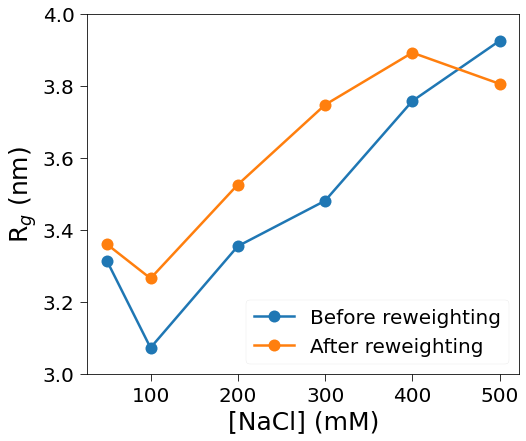

In [100]:
#Load notag Rgs from file
NaCl = [50,100,200,300,400,500]
Rg = []
Rg_avg = []
Rg_avg_rew = []

#Calculate Rg average from .xvg files and append to Rg_avg
for i in range(len(NaCl)):
    Rg.append(np.genfromtxt('Rg_minusstart_hnRNPA1_%imM_theta1.07.xvg' % NaCl[i],skip_header=27,skip_footer=0,usecols=[1],unpack=True))
    Rg_avg.append(np.average(Rg[i]))
    
    weights = np.genfromtxt('weights_%smM.dat' % str(NaCl[i]), usecols=[1])
    Rg_avg_rew.append(np.average(Rg[i], weights=weights))
    
#Plot Rg averages
fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(NaCl, Rg_avg, 'o-', linewidth=2.5, markersize=12, label='Before reweighting')
plt.plot(NaCl, Rg_avg_rew, 'o-', linewidth=2.5, markersize=12, label='After reweighting')

plt.legend(fontsize=20)

#plt.ylim(2.8, 3.3)
#plt.xlim(40, 510)


plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('R$_g$ (nm)', fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(np.arange(3.0, 4.1, step=0.2), fontsize=20) 

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig("../figures/Rgcoords_vs_NaCl_beforeafter_rew.pdf", bbox_inches='tight', pad_inches=1)

In [101]:
output='Rgcoords_vs_NaCl.dat'
with open(output, 'w') as f:
    f.write('#NaCl \tRg_coords_beforerew \tRg_coords_afterrew \n')
    for i in range(len(NaCl)):
        f.write('%i \t%f \t%f \n' % (NaCl[i], Rg_avg[i], Rg_avg_rew[i])) 

# LCD-folded domains contacts histogram

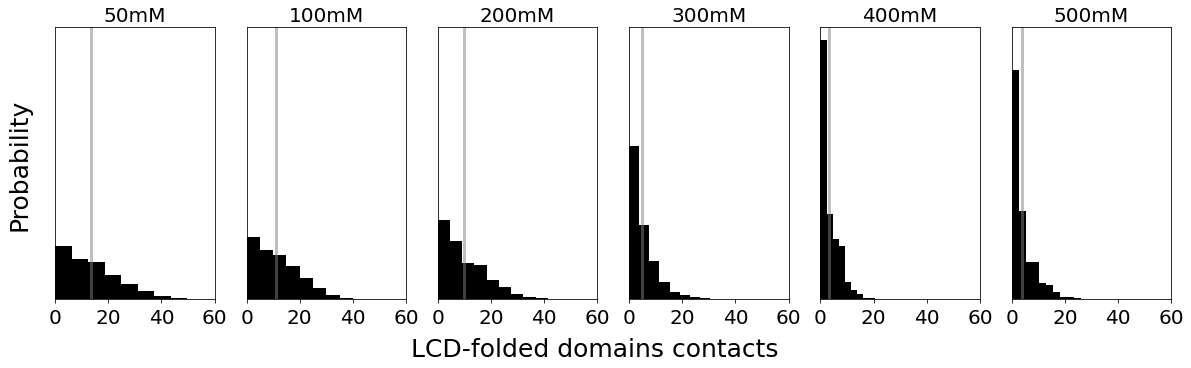

In [62]:
#LCD-RRM contacts
numcontdata = []
weights = []

conclist=[50,100,200,300,400,500]

for i in range(len(conclist)):
    numcontdata.append(np.genfromtxt('numcont_SUMORRM_LCD_minusstart_hnRNPA1_%imM_theta1.07.xvg' % conclist[i], skip_header=24, usecols=(1), unpack=True))
    weights.append(np.genfromtxt('weights_%imM.dat' % conclist[i], usecols=(1), unpack=True))

fig, ax = plt.subplots(figsize = (20,5),ncols=6, sharex='col', sharey='row')
for i in range(len(numcontdata)):
    #ax[i].hist(numcontdata[i], bins=20, density=True, histtype='bar', linewidth=3, label="Before reweighting")
    ax[i].hist(numcontdata[i], bins=10, density=True, histtype='bar', linewidth=3, weights=weights[i], label="After reweighting", color="black")
    ax[i].set_xticks(np.arange(0, 70, step=20))
    ax[i].set_yticks([])
    ax[i].set_xlim(left=0, right=60)
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].set_title(str(conclist[i]) + 'mM', fontsize=20)
    #ax[i].axvline(x=np.average(numcontdata[i]), linewidth=3, alpha=0.5, label="Before reweighting")
    ax[i].axvline(x=np.average(numcontdata[i], weights=weights[i]), linewidth=3, alpha=0.5, label="After reweighting", color="gray")

#plt.legend(fontsize=20)
fig.text(0.5, 0.02, 'LCD-folded domains contacts', ha='center', va='top', fontsize=25)
fig.text(0.1, 0.5, 'Probability', rotation=90, ha='center', va='center', fontsize=25)

fig.savefig("../figures/LCD_SUMORRMs_contacts_histogram.pdf", bbox_inches='tight', pad_inches=1)


# LCD-RRM contacts vs LCD-SUMO contacts

## Number of contacts vs NaCl

In [63]:
NaCl = [50,100,200,300,400,500]

#Load LCD-HisSUMO contacts from .xvg files and average (also weighted)
directory = '/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

avg_LCD_SUMO_contacts_NaCl = []
avg_LCD_SUMO_contacts_rew_NaCl = []

for conc in NaCl:
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))

    contacts = np.genfromtxt(directory + 'numcont_LCD_HisSUMO_hnRNPA1_' + str(conc) + 'mM_theta1.07.xvg', usecols=(1), skip_header=24)
    
    assert len(weights) == len(contacts)
    
    avg_LCD_SUMO_contacts_NaCl.append(np.average(contacts))
    avg_LCD_SUMO_contacts_rew_NaCl.append(np.average(contacts, weights = weights))

In [64]:
#Load LCD-RRMs contacts from .xvg files and average (also weighted)
directory = '/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

avg_LCD_RRMs_contacts_NaCl = []
avg_LCD_RRMs_contacts_rew_NaCl = []

for conc in NaCl:
    
    weights = np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1))

    contacts = np.genfromtxt(directory + 'numcont_allRRM_LCD_minusstart_hnRNPA1_' + str(conc) + 'mM_theta1.07.xvg', usecols=(1), skip_header=24)
    
    assert len(weights) == len(contacts)
    
    avg_LCD_RRMs_contacts_NaCl.append(np.average(contacts))
    avg_LCD_RRMs_contacts_rew_NaCl.append(np.average(contacts, weights = weights))

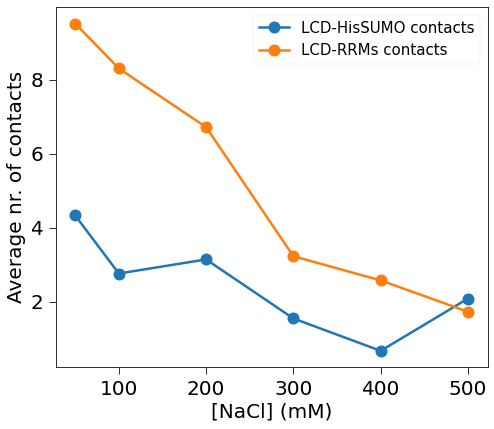

In [65]:
#Plot
fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(NaCl, avg_LCD_SUMO_contacts_rew_NaCl, 'o-', linewidth=2.5, markersize=12, label='LCD-HisSUMO contacts')
plt.plot(NaCl, avg_LCD_RRMs_contacts_rew_NaCl, 'o-', linewidth=2.5, markersize=12, label="LCD-RRMs contacts")

#plt.ylim(2.9, 4.22)
#plt.xlim(40, 510)

#plt.yscale('log')
plt.legend(fontsize=15)

plt.xlabel('[NaCl] (mM)', fontsize=20)
plt.ylabel('Average nr. of contacts', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/LCD_HisSUMO_and_LCD_RRMs_contacts.pdf', bbox_inches='tight', pad_inches=1)


## SUMO-bound vs RRM-bound frames 

In [66]:
#Load contacts data

directory = '/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

SUMOcontacts = []
RRMcontacts = []
weights = []

for conc in NaCl:
    SUMOcontacts.append(np.genfromtxt(directory + 'numcont_LCD_HisSUMO_hnRNPA1_' + str(conc) + 'mM_theta1.07.xvg', usecols=(1), skip_header=24))
    RRMcontacts.append(np.genfromtxt(directory + 'numcont_allRRM_LCD_minusstart_hnRNPA1_' + str(conc) + 'mM_theta1.07.xvg', usecols=(1), skip_header=24))
    weights.append(np.genfromtxt(directory + 'weights_' + str(conc) + 'mM.dat', usecols=(1)))

In [67]:
#Count number of frames (weighted) with a higher (or same) number of LCD-SUMO contacts than LCD-RRM contacts

SUMO_gt_RRM_frames_rew = [0]*len(NaCl)
RRM_gt_SUMO_frames_rew = [0]*len(NaCl)

for i in range(len(NaCl)):
    for j in range(len(SUMOcontacts[i])):
        if SUMOcontacts[i][j] >= RRMcontacts[i][j]:
            SUMO_gt_RRM_frames_rew[i] += weights[i][j]
        elif SUMOcontacts[i][j] < RRMcontacts[i][j]:
            RRM_gt_SUMO_frames_rew[i] += weights[i][j]

print(SUMO_gt_RRM_frames_rew)
print(RRM_gt_SUMO_frames_rew)

[0.31340799999999897, 0.3151760000000037, 0.3751529999999982, 0.4649010000000022, 0.4474279999999994, 0.6233010000000014]
[0.6866089999999934, 0.6848129999999875, 0.6248039999999897, 0.5351169999999998, 0.5525610000000001, 0.3767439999999979]


In [68]:
#Count number of frames (no weights) with a higher (or same) number of LCD-SUMO contacts than LCD-RRM contacts

SUMO_gt_RRM_frames_noweights = [0]*len(NaCl)
RRM_gt_SUMO_frames_noweights = [0]*len(NaCl)

for i in range(len(NaCl)):
    for j in range(len(SUMOcontacts[i])):
        if SUMOcontacts[i][j] >= RRMcontacts[i][j]:
            SUMO_gt_RRM_frames_noweights[i] += 1/len(SUMOcontacts[i])
        elif SUMOcontacts[i][j] < RRMcontacts[i][j]:
            RRM_gt_SUMO_frames_noweights[i] += 1/len(SUMOcontacts[i])

print(SUMO_gt_RRM_frames_noweights)
print(RRM_gt_SUMO_frames_noweights)
            

[0.3357718014840891, 0.3381400978895402, 0.41603073522437667, 0.4482921951475218, 0.4745539708435241, 0.6160202094624704]
[0.664228198515653, 0.6618599021102018, 0.5839692647753654, 0.5517078048522203, 0.525446029156218, 0.38397979053727166]


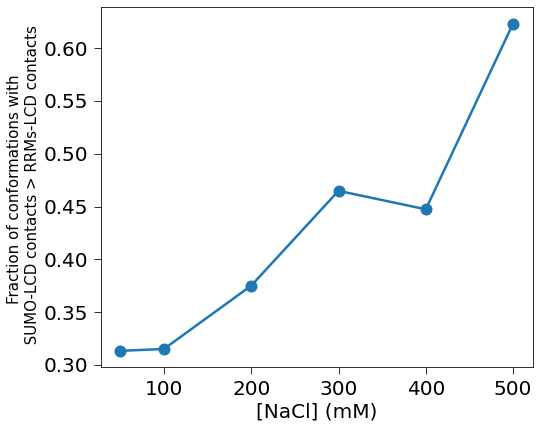

In [69]:
#Plot
fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(NaCl, SUMO_gt_RRM_frames_rew, 'o-', linewidth=2.5, markersize=12)

#plt.ylim(2.9, 4.22)
#plt.xlim(40, 510)

#plt.yscale('log')
#plt.legend(fontsize=15)

plt.xlabel('[NaCl] (mM)', fontsize=20)
plt.ylabel('Fraction of conformations with \n SUMO-LCD contacts > RRMs-LCD contacts', fontsize=15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/LCD_SUMO_gt_RRM_contacts_vs_NaCl.pdf', bbox_inches='tight', pad_inches=1)


In [70]:
#Count fraction of frames (weighted) with nr of LCD-SUMO contacts >4 
#do the same for LCD-RRM contacts

SUMOframes_rew = [0]*len(NaCl)
RRMframes_rew = [0]*len(NaCl)

for i in range(len(NaCl)):
    for j in range(len(SUMOcontacts[i])):
        if SUMOcontacts[i][j] > 4:
            SUMOframes_rew[i] += weights[i][j]
        if RRMcontacts[i][j] > 4:
            RRMframes_rew[i] += weights[i][j]

print(SUMOframes_rew)
print(RRMframes_rew)

[0.3037799999999987, 0.2443720000000038, 0.2652170000000029, 0.13896200000000025, 0.05535400000000015, 0.18422899999999984]
[0.6772969999999933, 0.5971459999999847, 0.5299919999999972, 0.2781109999999993, 0.23099399999999895, 0.13334599999999958]


In [71]:
#Count number of frames (no weights) with nr of LCD-SUMO contacts >4 
#do the same for LCD-RRM contacts

SUMOframes_noweights = [0]*len(NaCl)
RRMframes_noweights = [0]*len(NaCl)

for i in range(len(NaCl)):
    for j in range(len(SUMOcontacts[i])):
        if SUMOcontacts[i][j] > 4:
            SUMOframes_noweights[i] += 1/len(SUMOcontacts[i])
        if RRMcontacts[i][j] > 4:
            RRMframes_noweights[i] += 1/len(RRMcontacts[i])

print(SUMOframes_noweights)
print(RRMframes_noweights)

[0.31072048839531735, 0.33803484027152014, 0.32845639703169566, 0.18756907531182673, 0.06978580074732946, 0.09204778695858162]
[0.6454397136990742, 0.6377559075836106, 0.5074469764747895, 0.3218777959054426, 0.20688384821851596, 0.10704699752644656]


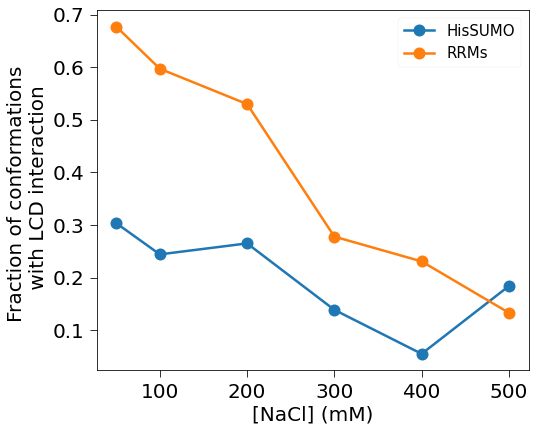

In [72]:
#Plot
fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(NaCl, SUMOframes_rew, 'o-', linewidth=2.5, markersize=12, label='HisSUMO')
plt.plot(NaCl, RRMframes_rew, 'o-', linewidth=2.5, markersize=12, label='RRMs')


#plt.ylim(2.9, 4.22)
#plt.xlim(40, 510)

#plt.yscale('log')
plt.legend(fontsize=15)

plt.xlabel('[NaCl] (mM)', fontsize=20)
plt.ylabel('Fraction of conformations \n with LCD interaction', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/LCD_bound_frames_vs_NaCl.pdf', bbox_inches='tight', pad_inches=1)


# Rg comparison with without HisSUMO

In [76]:
#Load notag Rgs from file
NaCl = [50,150,250,400,1000]
Rg = []
Rg_avg_rew = []

directory='/storage1/thomasen/hnRNPA1/ionicstrength_notag_productionrun/data/'

#Calculate Rg average from .xvg files and append to Rg_avg
for i in range(len(NaCl)):
    Rg.append(np.genfromtxt(directory + 'Rg_gyrate_' + str(NaCl[i]) + 'mM.xvg',skip_header=27,skip_footer=0,usecols=[1],unpack=True))    
    print(len(Rg[i]))
    
    weights = np.genfromtxt(directory + 'weights_%smM.dat' % str(NaCl[i]), usecols=[1])
    Rg_avg_rew.append(np.average(Rg[i], weights=weights))

19001
19001
19001
19001
19001


In [77]:
#Load with tag Rgs from file
NaCl_HisSUMO = [50,100,200,300,400,500]
Rg_HisSUMO = []
Rg_avg_rew_HisSUMO = []


directory = '/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'


#Calculate Rg average from .xvg files and append to Rg_avg
for i in range(len(NaCl_HisSUMO)):
    Rg_HisSUMO.append(np.genfromtxt(directory + 'Rg_RRMs_LCD_' + str(NaCl_HisSUMO[i]) + 'mM.xvg',skip_header=27,skip_footer=0,usecols=[1],unpack=True))    
    print(len(Rg_HisSUMO[i]))
    
    weights_HisSUMO = np.genfromtxt(directory + 'weights_%smM.dat' % str(NaCl_HisSUMO[i]), usecols=[1])
    Rg_avg_rew_HisSUMO.append(np.average(Rg_HisSUMO[i], weights=weights_HisSUMO))

19001
19001
19001
19001
19001
19001


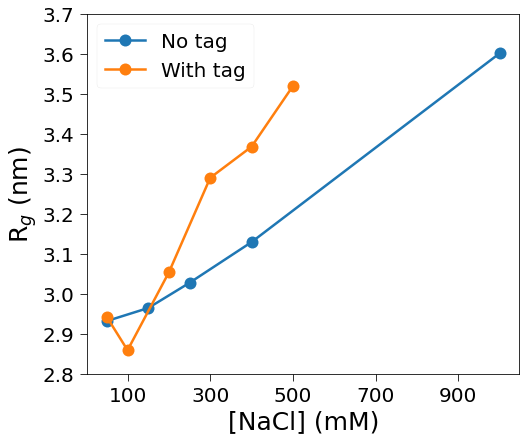

In [78]:
#Plot Rg averages
fig= plt.figure(figsize=(6,5))
axes= fig.add_axes([1,1,1,1])

plt.plot(NaCl, Rg_avg_rew, 'o-', linewidth=2.5, markersize=12, label='No tag')
plt.plot(NaCl_HisSUMO, Rg_avg_rew_HisSUMO, 'o-', linewidth=2.5, markersize=12, label='With tag')

plt.legend(fontsize=20)

#plt.ylim(2.8, 3.3)
#plt.xlim(40, 510)


plt.xlabel('[NaCl] (mM)', fontsize=25)
plt.ylabel('R$_g$ (nm)', fontsize=25)

plt.xticks(np.arange(100, 1001, step=200),fontsize=20)
plt.yticks(np.arange(2.8, 3.8, step=0.1),fontsize=20) 

plt.tick_params(colors='black', direction='out', length=7)

fig.savefig('/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/Rg_vs_NaCl_with_without_tag.pdf', bbox_inches='tight', pad_inches=1)


# LCD-RRM contacts histogram with without HisSUMO

In [97]:
#Get LCD-RRM contacts without tag

import matplotlib.pyplot as plt
import numpy as np

DC = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.style.use('seaborn-paper')

directory = '/storage1/thomasen/hnRNPA1/ionicstrength_notag_productionrun/data/'

numcontdata = []
weights = []

conclist=[50,150,250,250,400,1000]

for i in range(len(conclist)):
    numcontdata.append(np.genfromtxt(directory + 'LCDRRM_contacts_minusstart_'+ str(conclist[i]) +'mM.xvg', skip_header=24, usecols=(1), unpack=True))
    weights.append(np.genfromtxt(directory + 'weights_' + str(conclist[i]) + 'mM.dat', usecols=(1), unpack=True))



In [98]:
#Get LCD-RRM contacts with tag
directory = '/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/data/'

numcontdata_HisSUMO = []
weights_HisSUMO = []

conclist_HisSUMO=[50,100,200,300,400,500]

for i in range(len(conclist)):
    numcontdata_HisSUMO.append(np.genfromtxt(directory + 'numcont_allRRM_LCD_minusstart_hnRNPA1_'+ str(conclist_HisSUMO[i]) +'mM_theta1.07.xvg', skip_header=24, usecols=(1), unpack=True))
    weights_HisSUMO.append(np.genfromtxt(directory + 'weights_' + str(conclist_HisSUMO[i]) + 'mM.dat', usecols=(1), unpack=True))



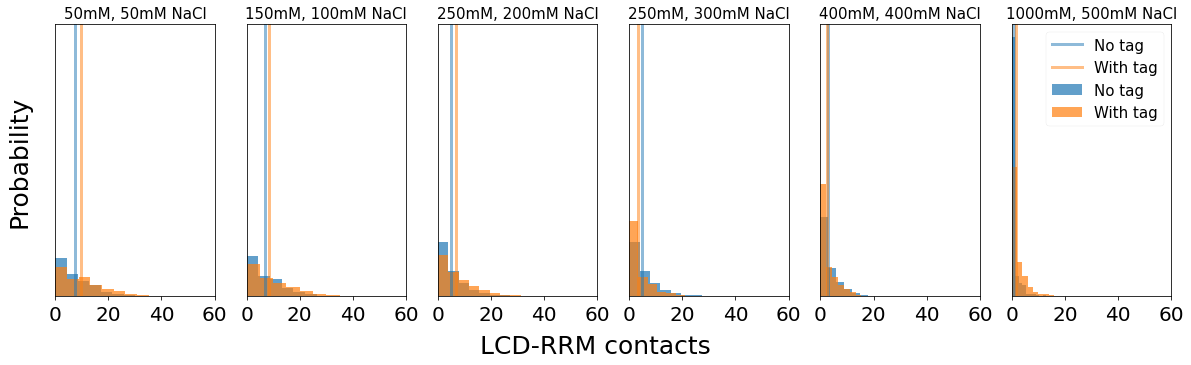

In [99]:
fig, ax = plt.subplots(figsize = (20,5),ncols=6, sharex='col', sharey='row')
for i in range(len(numcontdata)):
    ax[i].hist(numcontdata[i], bins=10, density=True, histtype='bar', linewidth=3, weights=weights[i], label="No tag", alpha=0.7)
    ax[i].hist(numcontdata_HisSUMO[i], bins=10, density=True, histtype='bar', linewidth=3, weights=weights_HisSUMO[i], label="With tag", alpha=0.7)
    ax[i].set_xticks(np.arange(0, 70, step=20))
    ax[i].set_yticks([])
    ax[i].set_xlim(left=0, right=60)
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].set_title('%imM, %imM NaCl' % (conclist[i], conclist_HisSUMO[i]), fontsize=15)
    ax[i].axvline(x=np.average(numcontdata[i], weights=weights[i]), linewidth=3, alpha=0.5, label="No tag", color="C0")
    ax[i].axvline(x=np.average(numcontdata_HisSUMO[i], weights=weights_HisSUMO[i]), linewidth=3, alpha=0.5, label="With tag", color="C1")

plt.legend(fontsize=15)
fig.text(0.5, 0.02, 'LCD-RRM contacts', ha='center', va='top', fontsize=25)
fig.text(0.1, 0.5, 'Probability', rotation=90, ha='center', va='center', fontsize=25)

fig.savefig("/lindorffgrp-isilon/thomasen/hnRNPA1/hnRNPA1_ionicstrength_2/figures/LCD_RRM_contacts_histogram_with_without_tag.pdf", bbox_inches='tight', pad_inches=1)
